> ### ***SUBMITTED BY: MALAIKA AHMED***
>
# ***🔴 Task 35: Convolutional Neural Networks (CNNs)***

Convolutional Neural Networks (CNNs) are a type of deep learning model particularly well-suited for image and video recognition tasks. They work by using convolutional layers to automatically and adaptively learn spatial hierarchies of features from input images. Basic tasks that can be done from scratch with CNNs include image classification, where the model learns to categorize images into predefined classes, and object detection, where the model identifies and locates objects within an image. Other fundamental tasks include image segmentation, which involves partitioning an image into regions of interest, and image denoising, where the model learns to remove noise from images to enhance their quality.
***
***


 # <span style='color:Red'>  ***What is Convolutional Neural Networks (CNNs)?*** </span>

Convolutional Neural Networks (CNNs), also known as ConvNets, are a class of deep learning models that have revolutionized the field of computer vision and have found applications in various other domains like natural language processing and speech recognition. CNNs are specifically designed to process and analyze grid-like data, such as images and 2D signals, by learning hierarchical patterns and representations from the data. In this detailed explanation, we will break down the key components and concepts behind CNNs.


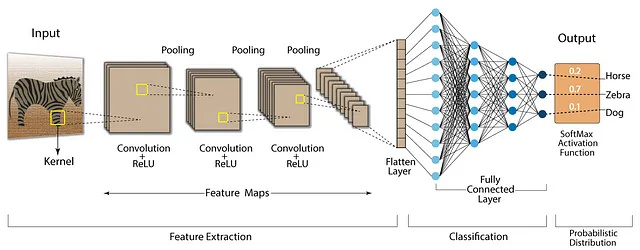

***

***
 ## <span style='color:Blue'>  ***Convolutional Neural Network Components:*** </span>

### ***Input Layer:***

The input to a CNN is typically a multi-dimensional array, often a 3D tensor for colored images with dimensions (width, height, channels) or a 2D tensor for grayscale images. For example, a colored image might have dimensions like (224, 224, 3), where 224x224 is the resolution i.e. the height and width and 3 represents the RGB color channels.
***

### ***Convolutional Layers:***

- Convolutional layers consist of a set of learnable filters (also known as kernels or feature detectors) that slide over the input image to detect patterns and features. Each filter captures a specific feature, such as edges, textures, or more complex structures.
- ***Convolution*** is a mathematical operation that involves element-wise multiplication of the filter with a portion of the input and then summing up the results to produce a single value (feature map).
- Multiple filters are applied in parallel to create multiple feature maps, effectively learning various features at different spatial scales.
Convolutional layers are followed by an activation function (commonly ReLU — Rectified Linear Unit) to introduce non-linearity.


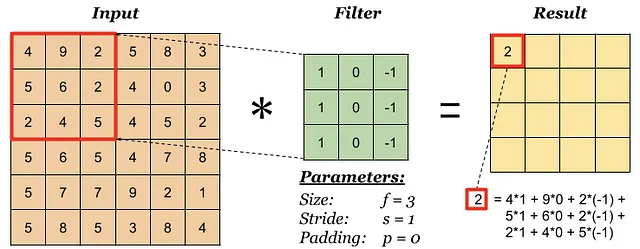



***

### ***Pooling Layers (Subsampling Layers):***

- Pooling layers reduce the spatial dimensions (width and height) of the feature maps while retaining important information. Common pooling operations include max-pooling,min-pooling and average-pooling.
- Pooling helps make the network more robust to variations in object position and size by abstracting the presence or absence of features within a region.




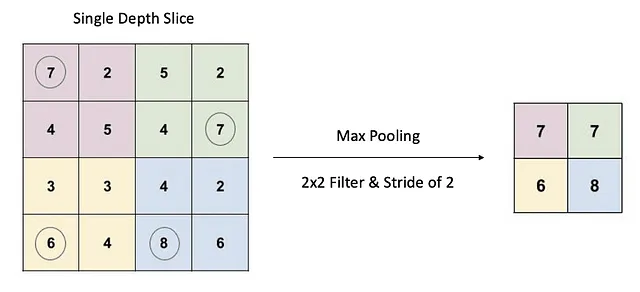

***


### ***Fully Connected Layers (Dense Layers):***

- After several convolutional and pooling layers, fully connected layers are used to make final predictions or classifications.
- The Fully Connected Layer a.k.a dense layer aims to provide global connectivity between all neurons in the layer.
- These layers connect every neuron from the previous layer to every neuron in the current layer.
- Fully connected layers often follow a flattened representation of the feature maps from the previous layer.

***


### ***Output Layer:***

The output layer provides the final predictions based on the features learned in the previous layers. The architecture of the output layer depends on the task. For classification, it usually consists of a softmax activation function to compute class probabilities.

***





***

# ***Object Detection with CNN from Scratch***

### ***Importing Necessary Libraries***

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


### ***Pre-Processing***

In [47]:
# Define the path to the image
image_path = '/content/fruits.png'

input_image = cv2.imread(image_path)


***
OpenCV loads images in BGR format, but Matplotlib displays images in RGB format. cv2.cvtColor() is used to convert the image from BGR to RGB so that the colors are displayed correctly when using Matplotlib.

In [48]:
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)


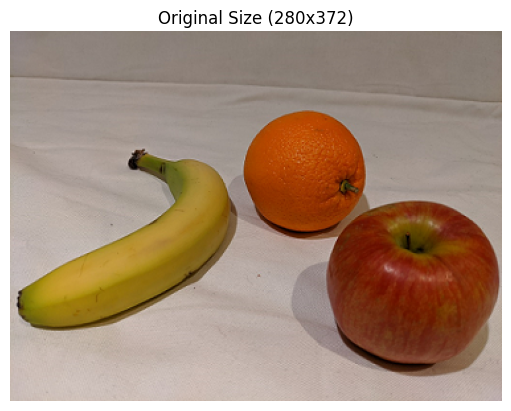

In [49]:
plt.imshow(input_image_rgb)
plt.title(f'Original Size ({input_image_rgb.shape[0]}x{input_image_rgb.shape[1]})')
plt.axis('off')  # Hide axis labels
plt.show()

## ***Resizing the Image***

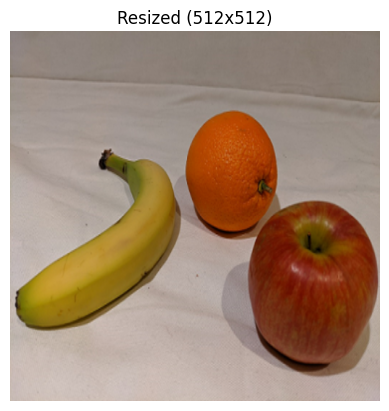

In [50]:
# Resize the image to 512x512
input_image = cv2.resize(input_image, (512, 512))
resize_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the resized image
plt.imshow(resize_image_rgb)
plt.title(f'Resized ({input_image.shape[0]}x{input_image.shape[1]})')
plt.axis('off')  # Hide axis labels
plt.show()


***
## ***Normalizing and Preparing the Image for Further Processing***

In [51]:
input_image = input_image.astype(np.float32) / 255.0
# The image pixel values are normalized by dividing by 255.0,
# converting them from a range of 0-255 to a range of 0-1.

### ***Adding Batch Dimension***

Neural networks typically expect input data in batches. Even if you have a single image, it needs to be reshaped to include a batch dimension. The np.expand_dims() function adds a new dimension at the specified axis, turning the image from shape (512, 512, 3) to (1, 512, 512, 3). This new shape represents a batch size of 1.

In [52]:
input_image = np.expand_dims(input_image, axis=0)  # Shape: (1, 512, 512, 3)


## ***Defining the Horizontal Edge Detection Filter***

Defining a 3x3 filter used to detect horizontal edges in an image. The values in the filter are chosen such that they highlight horizontal changes in pixel intensity. The dtype=np.float32 ensures that the filter values are stored as 32-bit floating-point numbers

In [53]:
hor_edge_filter = np.array([[30, 30, 30],
                            [0, 0, 0],
                            [-30, -30, -30]], dtype=np.float32)


### ***Normalizing the filter***

Normalizing by dividing them by 159.0, which is the sum of the absolute values of the filter elements. Normalizing helps to ensure that the filter doesn’t disproportionately alter the pixel values.

In [54]:
# Normalizing the filter
hor_edge_filter = hor_edge_filter / 159.0


### ***Adjusting the Filter Shape for Convolution***
Reshaping the filter to have four dimensions. The original shape of (3, 3) is expanded to (3, 3, 1, 1), where:
- The first two dimensions represent the height and width of the filter.
- The third dimension (1) corresponds to the number of input channels (e.g., grayscale images).
- The fourth dimension (1) represents the number of output channels (filters).

In [55]:
hor_edge_filter = hor_edge_filter[:, :, np.newaxis, np.newaxis]  # Shape: (3, 3, 1, 1)


### ***Repeat the Filter for RGB Channels***

 Since the original filter is designed for a single channel (e.g., grayscale images), it needs to be repeated to apply to all three RGB channels. The filter is repeated along the third and fourth axes to create a filter of shape (3, 3, 3, 3).


In [56]:
hor_edge_filter = np.repeat(hor_edge_filter, 3, axis=2)  # Repeat for RGB channels
hor_edge_filter = np.repeat(hor_edge_filter, 3, axis=3)  # Repeat for RGB channels

***
***
## ***Defining the Vertical Edge Detection Filter***

In [57]:
ver_edge_filter = np.array([[30, 0, -30],
                            [30, 0, -30],
                            [30, 0, -30]], dtype=np.float32)


In [58]:
# Normalizing the filter
ver_edge_filter = ver_edge_filter / 159.0


In [59]:
# Adjusting the shape for convolution
ver_edge_filter = ver_edge_filter[:, :, np.newaxis, np.newaxis]  # Shape: (3, 3, 1, 1)


In [60]:
# Repeating the filters for RGB Channels
ver_edge_filter = np.repeat(ver_edge_filter, 3, axis=2)  # Repeat for RGB channels
ver_edge_filter = np.repeat(ver_edge_filter, 3, axis=3)  # Repeat for RGB channels


***
***
# ***Defining the Sharpness Filter***
This filter enhances the sharpness of an image by amplifying the differences in pixel values. The central value is higher, which emphasizes the current pixel relative to its neighbors.

In [61]:
sharpness_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]], dtype=np.float32)


In [62]:
# Adjusting shape for convolution
sharpness_filter = sharpness_filter[:, :, np.newaxis, np.newaxis]  # Shape: (3, 3, 1, 1)


In [63]:
# Repeating filters for RGB channels
sharpness_filter = np.repeat(sharpness_filter, 3, axis=2)  # Repeat for RGB channels
sharpness_filter = np.repeat(sharpness_filter, 3, axis=3)  # Repeat for RGB channels


***
***

# ***Defining the Emboss Filter***
The emboss filter is designed to give a 3D effect by highlighting the edges in a way that simulates shadows and highlights.

In [64]:
embos_filter = np.array([[-2, -1, 0],
                         [-1, 1, 1],
                         [0, 1, 2]], dtype=np.float32)


In [65]:
embos_filter = embos_filter[:, :, np.newaxis, np.newaxis]  # Shape: (3, 3, 1, 1)


In [66]:
embos_filter = np.repeat(embos_filter, 3, axis=2)  # Repeat for RGB channels
embos_filter = np.repeat(embos_filter, 3, axis=3)  # Repeat for RGB channels


***
***

# ***Defining the conv2d Function***
Defining a function named conv2d that performs 2D convolution on an image using a given kernel (filter). The function takes two inputs: image, which is a 4D NumPy array representing the input image, and kernel, which is a 4D NumPy array representing the convolution filter.

In [67]:
def conv2d(image, kernel):

    # This line extracts the height, width, and number of channels from the image
    # and the height and width of the kernel.
    height, width, channels = image.shape[1], image.shape[2], image.shape[3]
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

    # You need to define pad_height and pad_width, or calculate them based on kernel size.
    # For example, for 'same' padding:
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Applying Padding on the Image
    padded_image = np.pad(image[0], ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')
    output = np.zeros((height, width, channels))


    # Performing convolution operation
    # The outer loop iterates over the height (i),
    # the middle loop over the width (j), and the inner loop over the channels (k)
    for i in range(height):
        for j in range(width):
            for k in range(channels):

                # Extracting a region of the padded image corresponding to the current position (i, j)
                # and the size of the kernel. The extracted region will have the same dimensions as the kernel.
                # This region will be used to compute the convolution at the current pixel.
                region = padded_image[i:i+kernel_height, j:j+kernel_width, k]



                # This line performs the actual convolution operation.
                # It multiplies the extracted region with the kernel element-wise and then
                #  sums the result to obtain the convolution value.
                # This value is assigned to the corresponding position (i, j, k) in the output array.
                output[i, j, k] = np.sum(region * kernel[:, :, k])

    return output

***
***

# ***Applying Filters Using the conv2d Function***


In [68]:
# Horizontal Edge Detection Filter
output1 = conv2d(input_image, hor_edge_filter)


In [69]:
# Vertical Edge Detection Filter

output2 = conv2d(input_image, ver_edge_filter)


In [70]:
# Sharpness Filter

output3 = conv2d(input_image, sharpness_filter)


In [71]:
# Embross Filter

output4 = conv2d(input_image, embos_filter)


***
***

# ***Visualizing the convolution results***

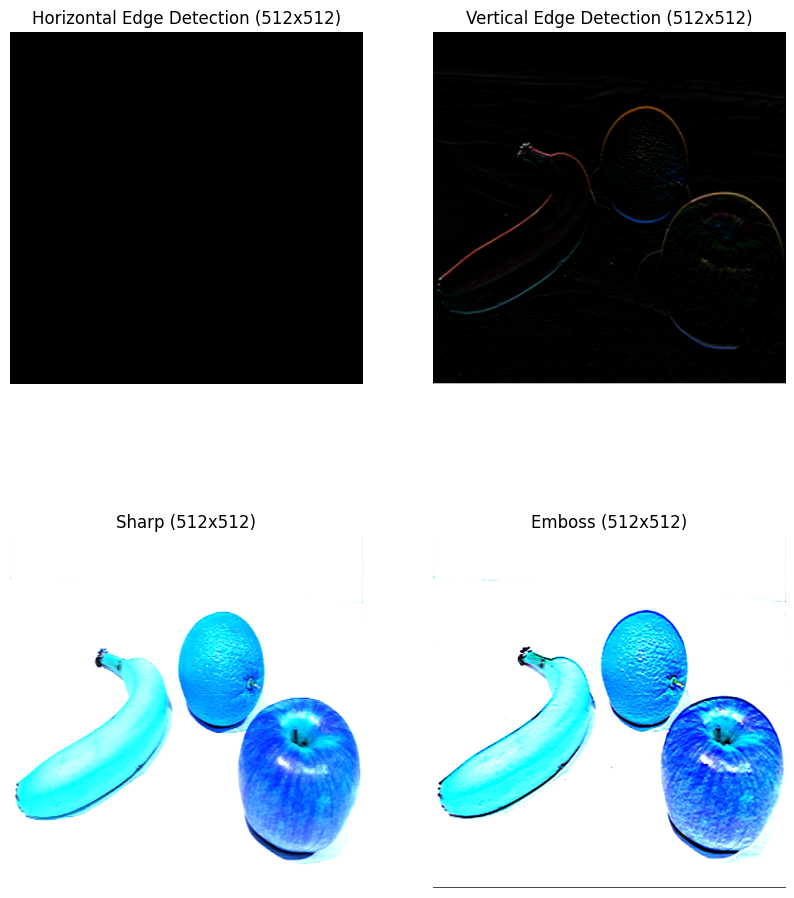

In [72]:

plt.figure(figsize=(10, 12))

plt.subplot(2, 2, 1)
plt.imshow(output1)
plt.title(f'Horizontal Edge Detection ({output1.shape[0]}x{output1.shape[1]})')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(output2)
plt.title(f'Vertical Edge Detection ({output2.shape[0]}x{output2.shape[1]})')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(output3)
plt.title(f'Sharp ({output3.shape[0]}x{output3.shape[1]})')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(output4, cmap='gray')
plt.title(f'Emboss ({output4.shape[0]}x{output4.shape[1]})')
plt.axis('off')

plt.show()


***

***